<div dir="rtl" align="center">
    <h2><strong> HW1: Overfitting Detection through Validation Set </strong></h2>
</div>

### **Import libraries**

Sepehr Moniri -- 981813205

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from matplotlib import pyplot as plt
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import numpy as np

### **Load train and test FasionMNIST dataset**

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = datasets.FashionMNIST(
    root='./data/F_MNIST_data/',
    download=True,
    train=True,
    transform=transform
)

testset = datasets.FashionMNIST(
    root='./data/F_MNIST_data/',
    download=True,
    train=False,
    transform=transform
)

# TODO: COMPLETE THIS CODE
BATCH_SIZE = 64
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)
testloader = DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False)

### **Construct Multi-Layer Neural Network Model**

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)

        return logits

### **Define Criterion and Optimizer**

In [ ]:
model = Net()

# TODO: COMPLETE THIS CODE

learning_rate = 0.007
BATCH_SIZE = 64

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

### **Training & Evaluating NN Model**

In [ ]:
EPOCHS = 10
train_losses, test_losses = list(), list()

for epoch in range(EPOCHS):
    train_loss = 0.0
    test_loss = 0.0
    correct = 0
    total = 0

    model.train()
    for images, labels in trainloader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    model.eval()
    with torch.no_grad():
        for images, labels in testloader:
            output = model(images)
            loss = criterion(output, labels)
            test_loss += loss.item()
            _, predicted = torch.max(output.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    train_losses.append(train_loss / len(trainloader))
    test_losses.append(test_loss / len(testloader))
    accuracy = 100 * correct / total
    print(f"Epoch: [{epoch + 1}/{EPOCHS}]\t",
          f"Training Loss: {train_losses[-1]:.3f}\t",
          f"Test Loss: {test_losses[-1]:.3f}\t",
          f"Test Accuracy: {accuracy:.3f}%")

Epoch: [1/10]	 Training Loss: 1.056	 Test Loss: 0.655	 Test Accuracy: 76.250%
Epoch: [2/10]	 Training Loss: 0.577	 Test Loss: 0.551	 Test Accuracy: 79.750%
Epoch: [3/10]	 Training Loss: 0.503	 Test Loss: 0.507	 Test Accuracy: 81.980%
Epoch: [4/10]	 Training Loss: 0.466	 Test Loss: 0.494	 Test Accuracy: 81.980%
Epoch: [5/10]	 Training Loss: 0.440	 Test Loss: 0.458	 Test Accuracy: 83.430%
Epoch: [6/10]	 Training Loss: 0.423	 Test Loss: 0.465	 Test Accuracy: 83.230%
Epoch: [7/10]	 Training Loss: 0.408	 Test Loss: 0.444	 Test Accuracy: 84.010%
Epoch: [8/10]	 Training Loss: 0.396	 Test Loss: 0.432	 Test Accuracy: 84.440%
Epoch: [9/10]	 Training Loss: 0.385	 Test Loss: 0.427	 Test Accuracy: 84.600%
Epoch: [10/10]	 Training Loss: 0.376	 Test Loss: 0.412	 Test Accuracy: 85.040%


### **Plot train and validation losses**

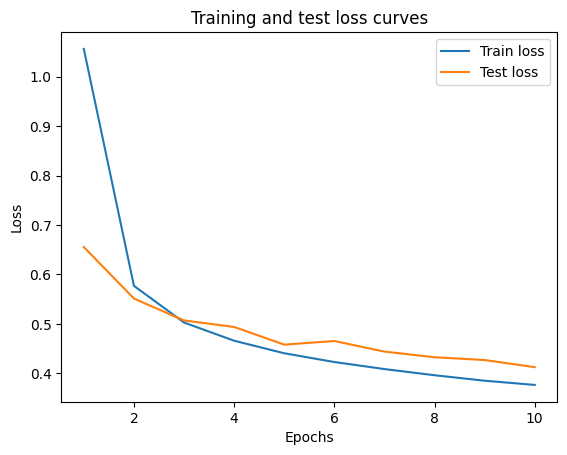

In [ ]:
# fig, ax = plt.subplots(figsize=(5, 4))

# _ = ax.plot(train_losses, label="train loss")
# _ = ax.plot(test_losses, label="val loss")

EPOCHS = 10
def learning_curve_plotter(train_losses, val_losses, EPOCH) :
    # plot the learning curves
    plt.plot(np.arange(1, EPOCH+1), train_losses, label="Train loss")
    plt.plot(np.arange(1, EPOCH+1), val_losses, label="Test loss")
    plt.title("Training and test loss curves")
    plt.ylabel("Loss")
    plt.xlabel("Epochs")
    plt.legend();

val_losses = test_losses
learning_curve_plotter(train_losses, val_losses, EPOCHS)